In [167]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
import statsmodels.formula.api as smf

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [168]:
air=pd.read_excel('D:\dinesh document\EXCELR\Data Science\Assingment\Forcasting_Assignment\Airlines+Data.xlsx')

In [169]:
air.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


### EDA

In [170]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [171]:
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [172]:
air.isna().sum()

Month         0
Passengers    0
dtype: int64

<AxesSubplot:>

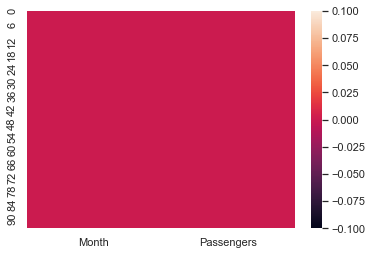

In [173]:
sns.heatmap(air.isna())

### Visualization

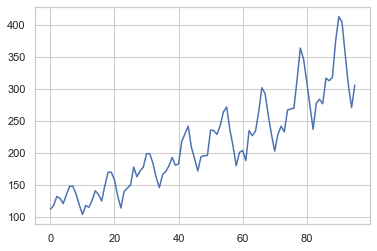

In [174]:
air['Passengers'].plot()
pyplot.show()

<AxesSubplot:>

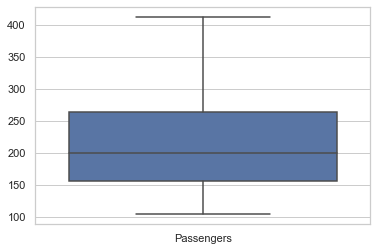

In [175]:
sns.boxplot(data=air)

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

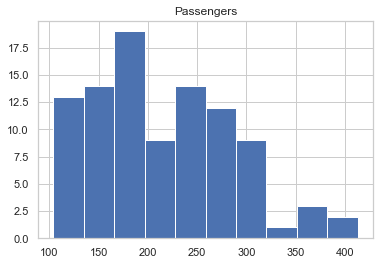

In [176]:
air.hist()

In [177]:
np.array(air['Passengers'])

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306], dtype=int64)

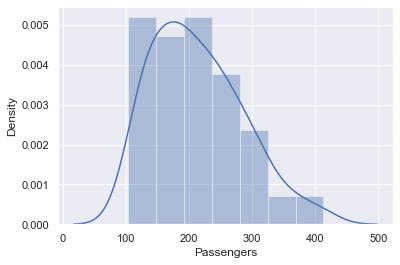

In [178]:
sns.set_theme()
rk= sns.distplot(air['Passengers'],kde=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

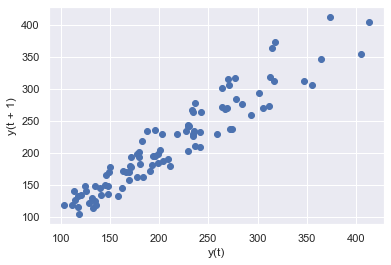

In [179]:
from pandas.plotting import lag_plot
lag_plot(air['Passengers'])

<AxesSubplot:xlabel='Passengers', ylabel='count'>

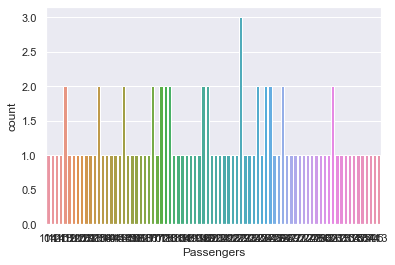

In [180]:
sns.countplot(data=air,x='Passengers')

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

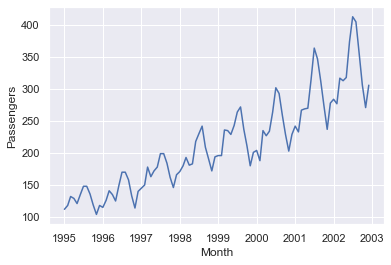

In [181]:
sns.lineplot(data=air, x='Month',y='Passengers')

<AxesSubplot:>

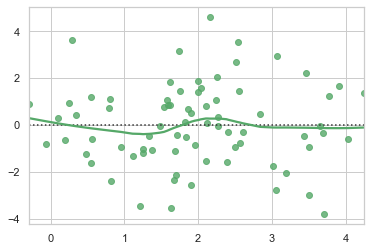

In [182]:
sns.set_theme(style="whitegrid")

# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x=x, y=y, lowess=True, color="g")


### Spliting Data

In [183]:
Train=air.head(90)
Test=air.tail(6)

In [184]:
Train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318


### Moving Average

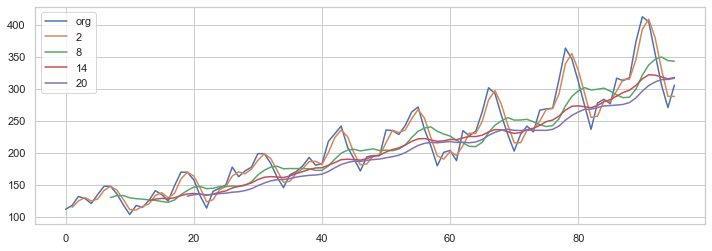

In [185]:
plt.figure(figsize=(12,4))
air.Passengers.plot(label="org")
for i in range(2,24,6):
    air['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### ACF plots and PACF plots

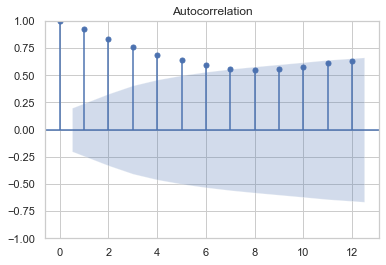

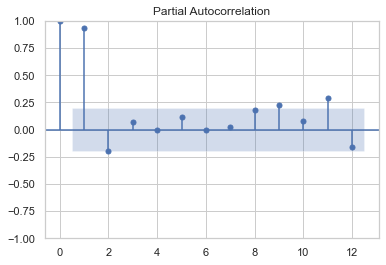

In [186]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(air.Passengers,lags=12)
tsa_plots.plot_pacf(air.Passengers,lags=12)
plt.show()

### Evaluation Metric MAPE

In [187]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [188]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

13.161170526223477

In [189]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

27.619306276788603

In [190]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

2.361773490196512

In [191]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

1.6206835473954773

#### Final Model by combining train and test

In [192]:
hwe_model_add_add = ExponentialSmoothing(air["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
hwe_model_add_add

In [193]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

96     319.235209
97     311.528305
98     350.278589
99     346.984848
100    351.844873
101    403.925556
102    440.566645
103    427.446333
104    376.628014
105    329.767326
dtype: float64

### separate out a validation dataset

In [194]:
split_point = len(air) - 10

In [195]:
dataset, validation = air[0:split_point], air[split_point:]

In [196]:
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


### Persistence/ Base model

In [162]:
#evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

In [197]:
train=pd.read_excel('D:\dinesh document\EXCELR\Data Science\Assingment\Forcasting_Assignment\Airlines+Data.xlsx',header=None, index_col=0, parse_dates=True, squeeze=True)

In [198]:
# prepare data
X = train.values
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [199]:
train

array(['Passengers', 112, 118, 132, 129, 121, 135, 148, 148, 136, 119,
       104, 118, 115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114,
       140, 145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166,
       171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172],
      dtype=object)

In [200]:
train_size

48

In [63]:
test

array([194, 196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201,
       204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229, 242,
       233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278, 284, 277,
       317, 313, 318, 374, 413, 405, 355, 306, 271, 306], dtype=object)

In [201]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)

In [202]:
history

['Passengers',
 112,
 118,
 132,
 129,
 121,
 135,
 148,
 148,
 136,
 119,
 104,
 118,
 115,
 126,
 141,
 135,
 125,
 149,
 170,
 170,
 158,
 133,
 114,
 140,
 145,
 150,
 178,
 163,
 172,
 178,
 199,
 199,
 184,
 162,
 146,
 166,
 171,
 180,
 193,
 181,
 183,
 218,
 230,
 242,
 209,
 191,
 172,
 194,
 196,
 196,
 236,
 235,
 229,
 243,
 264,
 272,
 237,
 211,
 180,
 201,
 204,
 188,
 235,
 227,
 234,
 264,
 302,
 293,
 259,
 229,
 203,
 229,
 242,
 233,
 267,
 269,
 270,
 315,
 364,
 347,
 312,
 274,
 237,
 278,
 284,
 277,
 317,
 313,
 318,
 374,
 413,
 405,
 355,
 306,
 271,
 306]

In [203]:
yhat

271

In [204]:
obs

306

In [205]:
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 28.640


### Transformation

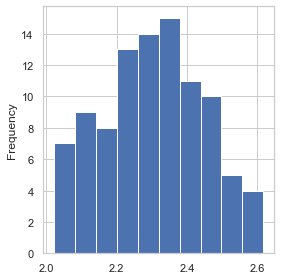

In [206]:
## log transformation - power law distribution ##
log_var = ['Passengers']
fig = plt.figure(figsize = (24,10))

for j in range(len(log_var)):
    var = log_var[j]
    transformed = "log_" + var
    air[transformed] = np.log10(air[var]+1)
    sub = fig.add_subplot(2, 5, j + 1)
    air[transformed].plot(kind = 'hist')

count     96.000000
mean     213.708333
std       71.918216
min      104.000000
25%      156.000000
50%      200.000000
75%      264.750000
max      413.000000
Name: Passengers, dtype: float64
count     96.000000
mean     212.260417
std       67.488829
min      118.000000
25%      156.000000
50%      200.000000
75%      264.750000
max      349.000000
Name: clipped_Passengers, dtype: float64


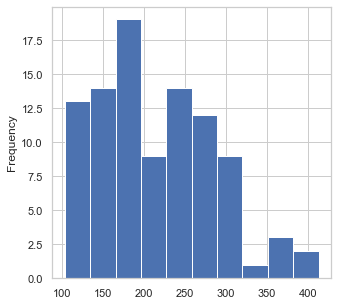

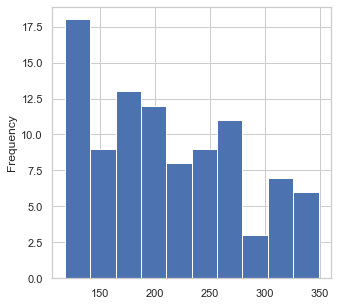

In [207]:
# clipping methods - handle outliers ##
clip_var=['Passengers']
for i in clip_var:
    transformed = 'clipped_'+ i
# upper limit - .95 quantile
    upper_limit = air[i].quantile(0.95)
# lower limit - .05 quantile
    lower_limit = air[i].quantile(0.05)
    air[transformed] =air[i].clip(lower_limit, upper_limit, axis = 0)
    
    print(air[i].describe())
    print(air[transformed].describe())
    
    plt.figure(figsize = (5,5))
    air[i].plot(kind = 'hist')
    
    plt.figure(figsize = (5,5))
    air[transformed].plot(kind = 'hist')

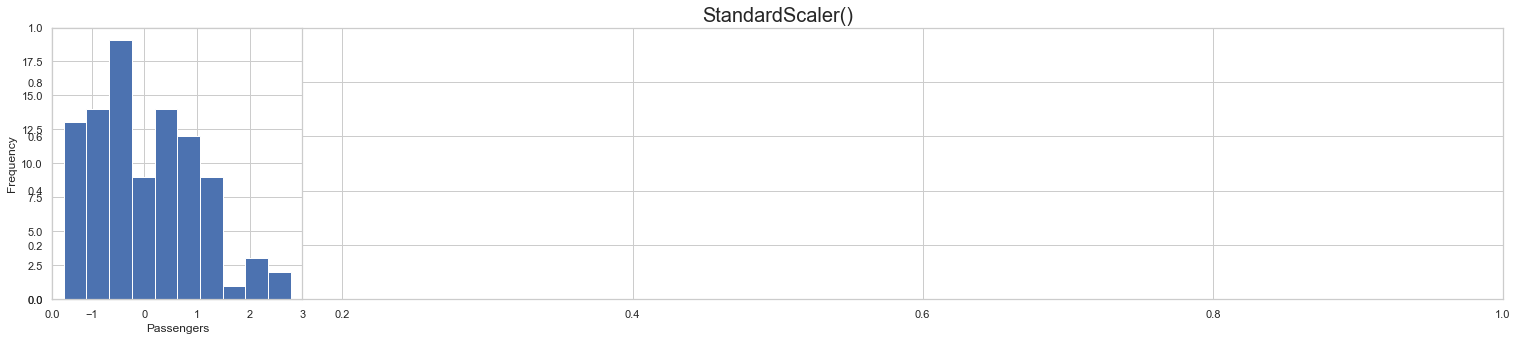

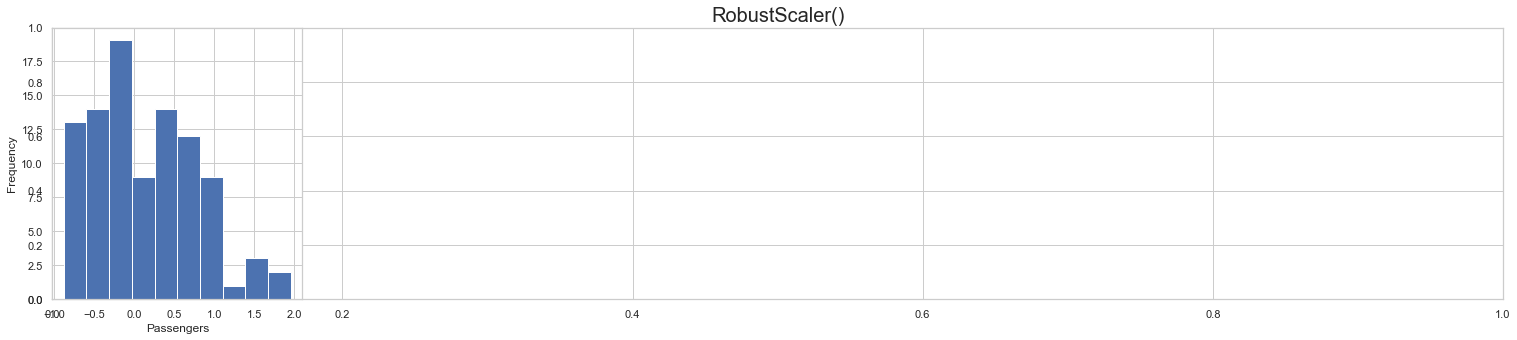

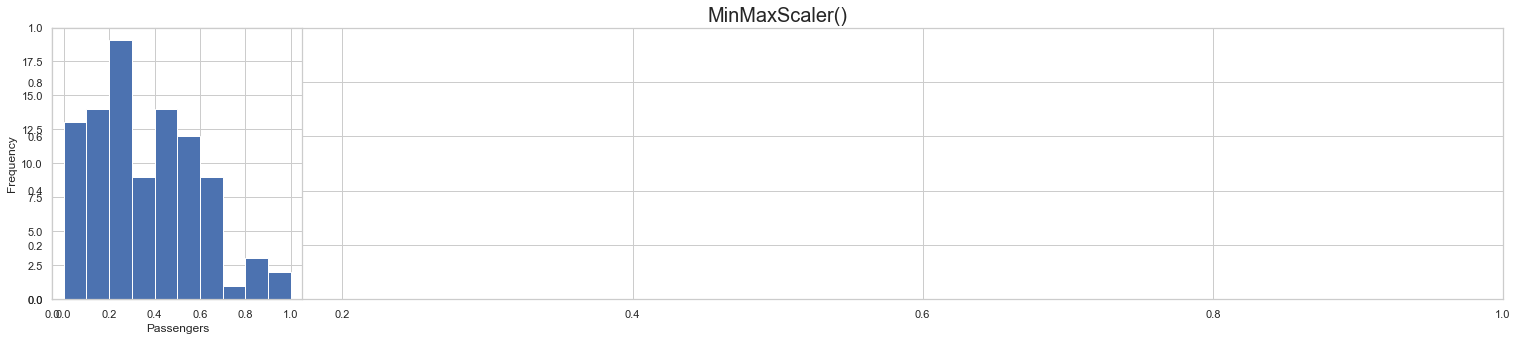

In [208]:
## data scaling methods ##
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
scale_var = ['Passengers']
scalers_list = [StandardScaler(), RobustScaler(), MinMaxScaler()]
for i in range(len(scalers_list)):
    scaler = scalers_list[i]
    fig = plt.figure(figsize = (26, 5))
    plt.title(scaler, fontsize = 20)
    for j in range(len(scale_var)):
        var = scale_var[j]
        scaled_var = "scaled_" + var
        model = scaler.fit(air[var].values.reshape(-1,1))
        air[scaled_var] = model.transform(air[var].values.reshape(-1, 1))
        sub = fig.add_subplot(1, 5, j + 1)
        sub.set_xlabel(var)
        air[scaled_var].plot(kind = 'hist')

### Checking Stationarity

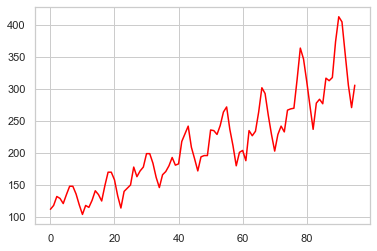

In [209]:
plt.plot(air['Passengers'],color='red')

(array([13., 14., 19.,  9., 14., 12.,  9.,  1.,  3.,  2.]),
 array([104. , 134.9, 165.8, 196.7, 227.6, 258.5, 289.4, 320.3, 351.2,
        382.1, 413. ]),
 <BarContainer object of 10 artists>)

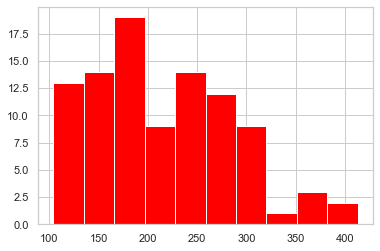

In [211]:
plt.hist(air['Passengers'],color='red')

### ARIMA Hyperparameters

In [212]:
## grid search arima

In [213]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [214]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE

In [216]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X=X.astype('int32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        # model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [217]:
X

array(['Passengers', 112, 118, 132, 129, 121, 135, 148, 148, 136, 119,
       104, 118, 115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114,
       140, 145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166,
       171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194, 196,
       196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201, 204, 188,
       235, 227, 234, 264, 302, 293, 259, 229, 203, 229, 242, 233, 267,
       269, 270, 315, 364, 347, 312, 274, 237, 278, 284, 277, 317, 313,
       318, 374, 413, 405, 355, 306, 271, 306], dtype=object)

In [85]:
train

array(['Passengers', 112, 118, 132, 129, 121, 135, 148, 148, 136, 119,
       104, 118, 115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114,
       140, 145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166,
       171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172],
      dtype=object)

In [86]:
train_size

48

In [87]:
test

array([194, 196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201,
       204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229, 242,
       233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278, 284, 277,
       317, 313, 318, 374, 413, 405, 355, 306, 271, 306], dtype=object)

In [88]:
history

['Passengers',
 112,
 118,
 132,
 129,
 121,
 135,
 148,
 148,
 136,
 119,
 104,
 118,
 115,
 126,
 141,
 135,
 125,
 149,
 170,
 170,
 158,
 133,
 114,
 140,
 145,
 150,
 178,
 163,
 172,
 178,
 199,
 199,
 184,
 162,
 146,
 166,
 171,
 180,
 193,
 181,
 183,
 218,
 230,
 242,
 209,
 191,
 172,
 194,
 196,
 196,
 236,
 235,
 229,
 243,
 264,
 272,
 237,
 211,
 180,
 201,
 204,
 188,
 235,
 227,
 234,
 264,
 302,
 293,
 259,
 229,
 203,
 229,
 242,
 233,
 267,
 269,
 270,
 315,
 364,
 347,
 312,
 274,
 237,
 278,
 284,
 277,
 317,
 313,
 318,
 374,
 413,
 405,
 355,
 306,
 271,
 306]

In [92]:
predictions

[172,
 194,
 196,
 196,
 236,
 235,
 229,
 243,
 264,
 272,
 237,
 211,
 180,
 201,
 204,
 188,
 235,
 227,
 234,
 264,
 302,
 293,
 259,
 229,
 203,
 229,
 242,
 233,
 267,
 269,
 270,
 315,
 364,
 347,
 312,
 274,
 237,
 278,
 284,
 277,
 317,
 313,
 318,
 374,
 413,
 405,
 355,
 306,
 271]

In [93]:
rmse

28.639917911180955

### Grid search for p,d,q values

In [218]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [219]:
train=pd.read_excel('D:\dinesh document\EXCELR\Data Science\Assingment\Forcasting_Assignment\Airlines+Data.xlsx',header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
#p_values = range(0, 5)
#d_values = range(0, 5)
#q_values = range(0, 5)
warnings.filterwarnings("ignore")
#evaluate_models(train.values, p_values, d_values, q_values)

In [220]:
train

0
Month                  Passengers
1995-01-01 00:00:00           112
1995-02-01 00:00:00           118
1995-03-01 00:00:00           132
1995-04-01 00:00:00           129
                          ...    
2002-08-01 00:00:00           405
2002-09-01 00:00:00           355
2002-10-01 00:00:00           306
2002-11-01 00:00:00           271
2002-12-01 00:00:00           306
Name: 1, Length: 97, dtype: object

### Build Model based on the optimized values

In [221]:
# save finalized model to file
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
import numpy as np
import pandas as pd
from numpy import sqrt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [227]:
train=pd.read_excel('D:\dinesh document\EXCELR\Data Science\Assingment\Forcasting_Assignment\Airlines+Data.xlsx',header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values

In [228]:
X

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [108]:
import statsmodels.api as sm

In [229]:
#fit model
model=sm.tsa.arima.ARIMA(train,order=(3,1,0))

In [230]:
modelfit=model.fit()

In [231]:
modelfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   96
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -427.616
Date:                Tue, 17 Jan 2023   AIC                            863.231
Time:                        13:48:17   BIC                            873.447
Sample:                    01-01-1995   HQIC                           867.359
                         - 12-01-2002                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3027      0.109      2.770      0.006       0.088       0.517
ar.L2         -0.2125      0.135     -1.579      0.114      -0.476       0.051
ar.L3         -0.1025      0.098     -1.043      0.297      -0.295       0.090
sigma2       474.4437     83.151      5.706      0.000     311.471     637.416
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 4.30
Prob(Q):                              0.72   Prob(JB):                         0.12
Heteroskedasticity (H):               4.05   Skew:                             0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [232]:
#Error on the test data
val=pd.read_excel('D:\dinesh document\EXCELR\Data Science\Assingment\Forcasting_Assignment\Airlines+Data.xlsx',header=None)
val

,0,1
0,Month,Passengers
1,1995-01-01 00:00:00,112
2,1995-02-01 00:00:00,118
3,1995-03-01 00:00:00,132
4,1995-04-01 00:00:00,129
...,...,...
92,2002-08-01 00:00:00,405
93,2002-09-01 00:00:00,355
94,2002-10-01 00:00:00,306
95,2002-11-01 00:00:00,271


In [233]:
rmse

28.639917911180955

### Combine train and test data and build final model

In [234]:
# fit model
data = pd.read_excel("D:\dinesh document\EXCELR\Data Science\Assingment\Forcasting_Assignment\Airlines+Data.xlsx", header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values

In [237]:
model = ARIMA(train.values,order=(3,1,0))
model

In [238]:
modelfit=model.fit()
modelfit

In [239]:
forecast=modelfit.forecast(steps=10)[0]

In [240]:
forecast

329.05318577589065